In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc-house-data/kc_house_data.csv


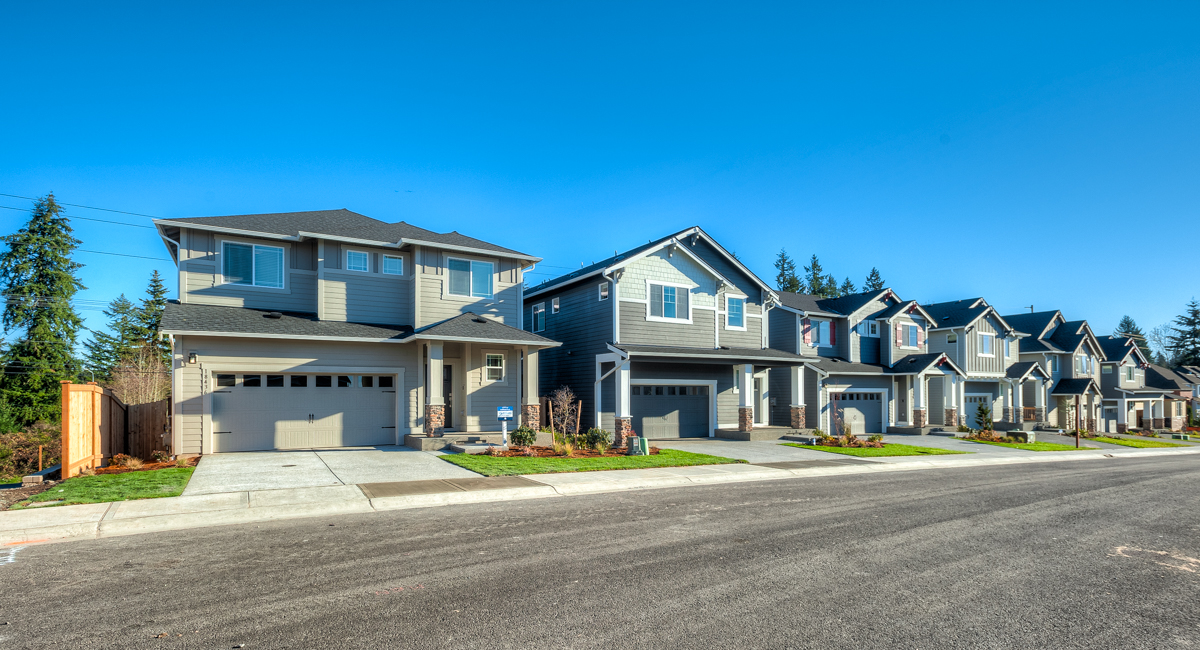

**Hello everyone, I hope you are well.
Today I will be conducting the analysis and forecasting of King County - Washington - US registration prices.
Before carrying out this deployment what is important to emphasize?
Many machine learning algorithms work best when numeric input variables are sized to a standard range. This includes algorithms that use a weighted sum of input, such as linear regression, and algorithms that use distance measures, such as knn. Input variables can have different units which, in turn, can mean input variables with different scales.

In the end if you liked it, give a positive vote, if you didn't like it, leave the comment.

Let's get started!**

**We import the main libraries.**

In [2]:
#import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

**Bellow, a fuction to resize our plots**

In [3]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

In [4]:
df = pd.read_csv('../input/kc-house-data/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


**Let's drop the 'id' column. Not important for our work here.**

In [6]:
df.drop('id',inplace=True,axis=1)

**Let's see with what we're dealing with.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**Now, I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.**

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

**Let's see the result.**

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


**If you notice, there's a numbers in the columns 'bathrooms' and 'floors' indicating a float numbers.
Let's turn them on integers.**

In [11]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

**There is some null data?**

In [12]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

**Yes, just two.let's clean it.**

In [13]:
df.dropna(inplace=True)

**Let's drop de 'date column as I mentioned before.**

In [14]:
df.drop('date',inplace=True,axis=1)

In [15]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

**Starting the visualizations with distplot we can see a density of the Price but if you notice we can see a little bit outliers over 2 million.**

<AxesSubplot:xlabel='price', ylabel='Count'>

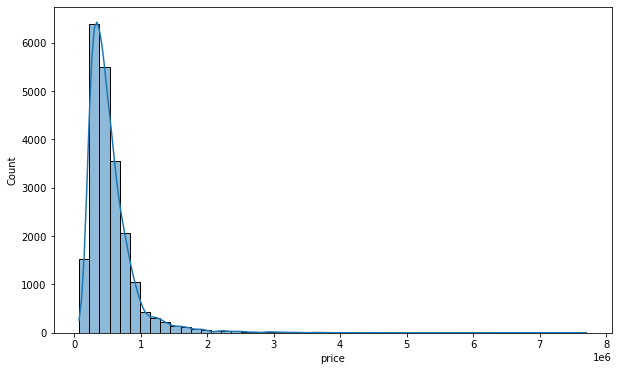

In [16]:
resizeplot(10,6)
sns.histplot(df['price'],kde=True,bins=50)

**Bellow, some of a few correlated features.**

<AxesSubplot:>

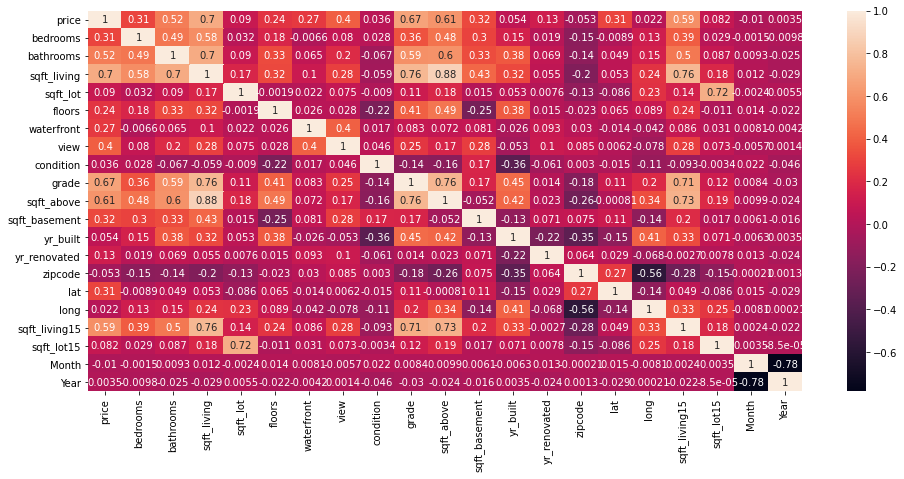

In [17]:
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

**Now, let's see how the price changed along the years.**

<AxesSubplot:xlabel='yr_built', ylabel='price'>

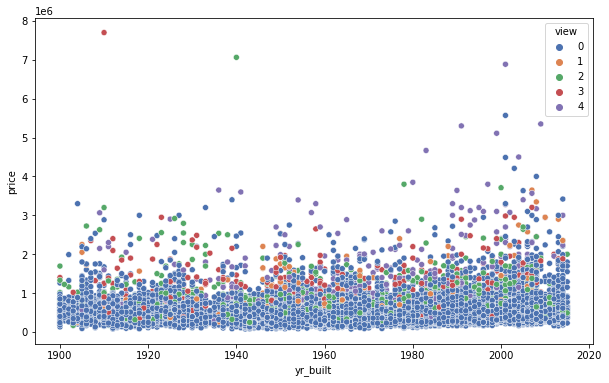

In [18]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

**As we can see bellow, there is a much more residences without a View than the others.**

<AxesSubplot:xlabel='view', ylabel='count'>

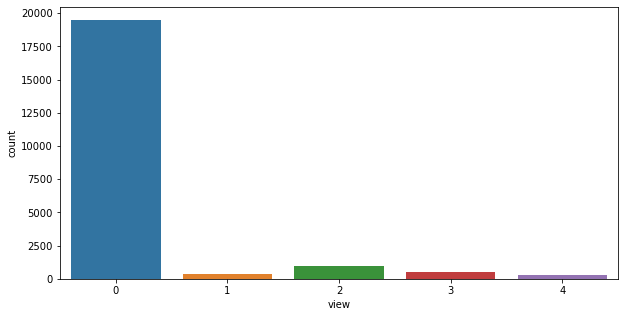

In [19]:
resizeplot(10,5)
sns.countplot(x='view',data=df)

**..and much less waterfront houses.**

<AxesSubplot:xlabel='waterfront', ylabel='count'>

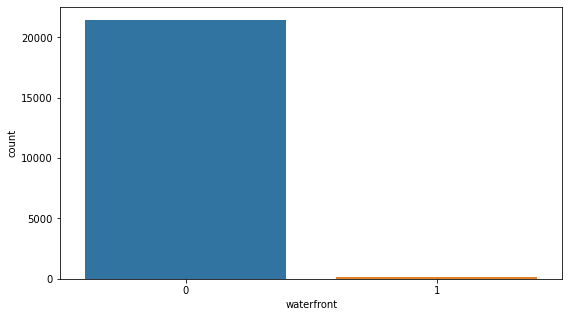

In [20]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)

**A linear analysis showing us the increase of the price along the years.**

<AxesSubplot:xlabel='Year', ylabel='price'>

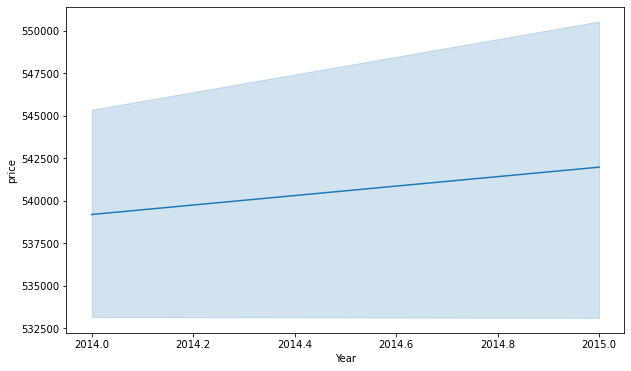

In [21]:
resizeplot(10,6)
sns.lineplot(x='Year',y='price',data=df)

**And of course, the higher the grade the higher the price.
Note that, the price does not vary much between 2 and 6,
probably due to the similarity of the houses.**

<AxesSubplot:xlabel='grade', ylabel='price'>

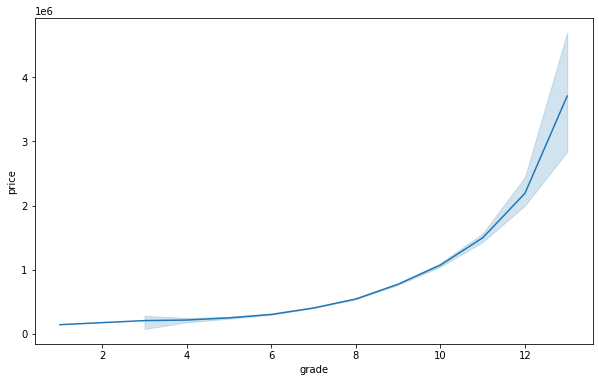

In [22]:
resizeplot(10,6)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')

**Let's visualyze for another perspective.**

<AxesSubplot:xlabel='grade', ylabel='price'>

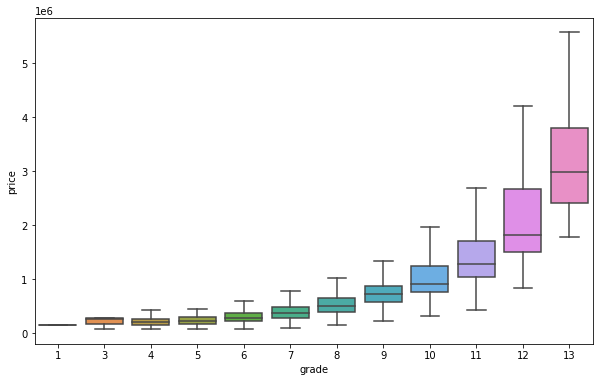

In [23]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=df,showfliers=False)

<Figure size 720x432 with 0 Axes>

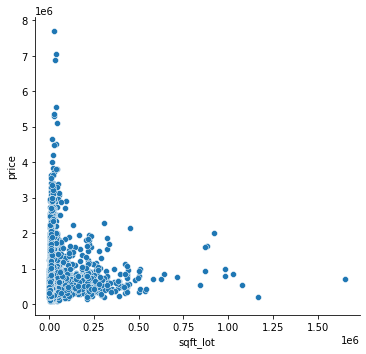

In [24]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')

**Now, let's do an analysis relating the number of rooms with a view to the price of the property.**

In [25]:
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())

Mean of 1 room with view:  622680.0


In [26]:
print('Mean of 1 room without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==1)]['price'].mean())

Mean of 1 room without view:  309781.1030927835


In [27]:
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==2)]['price'].mean())

Mean of 2 rooms with view:  918567.4838709678


In [28]:
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())

Mean of 2 rooms without view:  395497.62183950166


In [29]:
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())

Mean of 3 rooms with view:  1526424.21875


In [30]:
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())

Mean of 3 rooms without view:  459259.17501793214


In [31]:
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())

Mean of 4 rooms with view:  1928485.0


In [32]:
print('Mean of 4 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==4)]['price'].mean())

Mean of 4 rooms without view:  627880.810992545


**Relating the number of bathrooms with the price.**

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

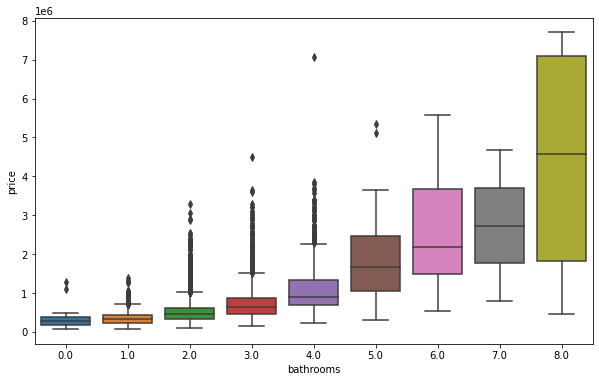

In [33]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

**We can see that the residences have more houses with 3 and 4 bedrooms than the others, which leads us to realize that there are several other attributes that value the house and not just bedrooms and bathrooms.**

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

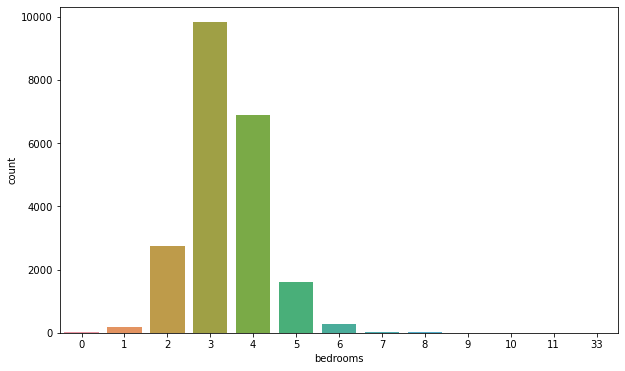

In [34]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)

# Let's start creating our models

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

In [36]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**Normalize the data.**

In [38]:
std = StandardScaler()

In [39]:
X = std.fit_transform(X)

**#RANDOM FOREST REGRESSOR**

In [40]:
rfr = RandomForestRegressor(n_estimators=200)

In [41]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [42]:
score_rfr = rfr.score(X_train,y_train)

In [43]:
prev_rfr = rfr.predict(X_test)

In [44]:
mae_rfr = mean_absolute_error(y_test,prev_rfr)

In [45]:
mse_rfr = mean_squared_error(y_test,prev_rfr)

In [46]:
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))

In [47]:
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

Mae:  124231.36088374397
Mse:  37912647022.48658
Rmse:  194711.70232548064


In [48]:
print(score_rfr)

0.9584837732427094


In [49]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

,Price,Predictions,Error
0,221900.0,335180.230,-113280.230
1,538000.0,636826.300,-98826.300
2,180000.0,318844.030,-138844.030
3,604000.0,456245.430,147754.570
4,510000.0,667843.695,-157843.695


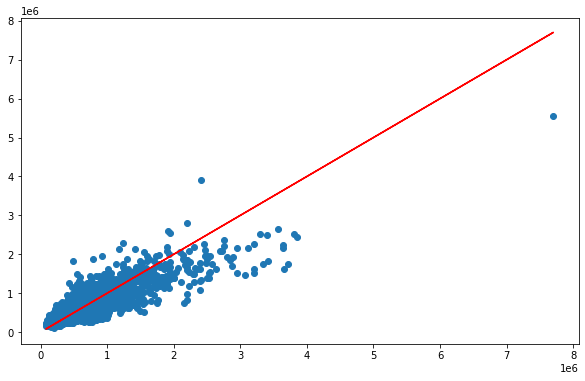

In [50]:
resizeplot(10,6)
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='red')

**LINEAR REGRESSION**

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
pred_lr = lr.predict(X_test)

In [54]:
score_lr = lr.score(X_train,y_train)

In [55]:
print(score_lr)

0.6065075278674394


In [56]:
lr.coef_[0]

-20757.990124204305

In [57]:
lr.intercept_

-678182.8989128264

In [58]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [59]:
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  153161.5652134555
Mse_lr:  54824397535.26486
Rmse_lr:  234146.10296834935


In [60]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,333194.535835,-111294.535835
1,538000.0,646143.675916,-108143.675916
2,180000.0,148119.323809,31880.676191
3,604000.0,605687.857613,-1687.857613
4,510000.0,652832.231348,-142832.231348


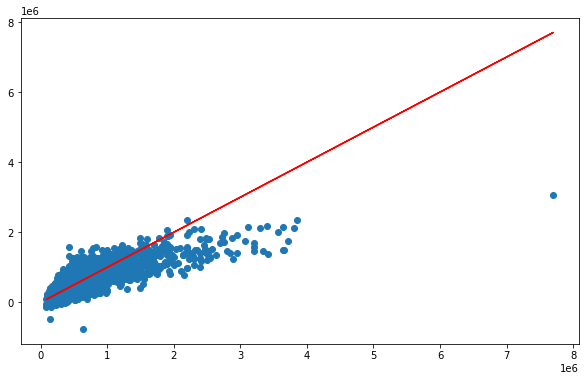

In [61]:
resizeplot(10,6)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

**POLYNOMIAL REGRESSION**

In [62]:
poly = PolynomialFeatures(degree=4)

In [63]:
X_train_poly = poly.fit_transform(X_train)

In [64]:
X_test_poly = poly.transform(X_test)

In [65]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [66]:
score_poly = lr.score(X_train_poly,y_train)

In [67]:
print(score_poly)

0.7565184621922203


In [68]:
pred_poly = lr.predict(X_test_poly)

In [69]:
pred_poly[0]

378487.44330813887

In [70]:
mae_poly = mean_absolute_error(y_test,pred_poly)
mse_poly = mean_squared_error(y_test,pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test,pred_poly))

In [71]:
print('Mae_poly:',mae_poly)
print('Mse_poly:',mse_poly)
print('Rmse_poly:',rmse_poly)

Mae_poly: 730986.9009793977
Mse_poly: 955898916590599.2
Rmse_poly: 30917614.988717988


**DECISION TREE REGRESSOR**

In [72]:
dtr = DecisionTreeRegressor(random_state=0)

In [73]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
pred_dtr = dtr.predict(X_test)

In [75]:
score_dtr = dtr.score(X_train,y_train)

In [76]:
print(score_dtr)

0.9993665112324681


In [77]:
mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

In [78]:
print('Mae_dtr: ',mae_dtr)
print('Mse_dtr: ',mse_dtr)
print('Rmse_dtr: ',rmse_dtr)

Mae_dtr:  168671.58878264442
Mse_dtr:  70711451410.27277
Rmse_dtr:  265916.24886469945


In [79]:
price_dtr = df['price']
predict_dtr = pd.Series(pred_dtr)
error_dtr = price_dtr-predict_dtr
data_dtr = {'Price':price_dtr,'Predictions':predict_dtr,'Error':error_dtr}
data_prev_dtr = pd.DataFrame(data_dtr)
data_prev_dtr.head()

,Price,Predictions,Error
0,221900.0,410000.0,-188100.0
1,538000.0,600000.0,-62000.0
2,180000.0,290000.0,-110000.0
3,604000.0,400000.0,204000.0
4,510000.0,612000.0,-102000.0


In [80]:
data_prev_dtr['Percentage_error'] = np.abs(data_prev_dtr['Error'])*100/data_prev_dtr['Price']

In [81]:
data_prev_dtr.head()

,Price,Predictions,Error,Percentage_error
0,221900.0,410000.0,-188100.0,84.767913
1,538000.0,600000.0,-62000.0,11.524164
2,180000.0,290000.0,-110000.0,61.111111
3,604000.0,400000.0,204000.0,33.774834
4,510000.0,612000.0,-102000.0,20.000000


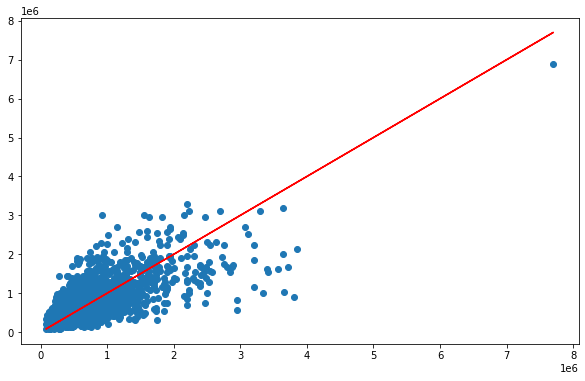

In [82]:
resizeplot(10,6)
plt.scatter(y_test,pred_dtr)
plt.plot(y_test,y_test,color='red')

> **KNN REGRESSOR**

In [83]:
knr = KNeighborsRegressor(n_neighbors = 10)

In [84]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [85]:
score_knr = knr.score(X_train,y_train)

In [86]:
print(score_knr)

0.5900434125593885


In [87]:
pred_knr = knr.predict(X_test)

In [88]:
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)

In [89]:
print('Mae_knr: ',mae_knr)
print('Mse_knr: ',mse_knr)
print('Rmse_knr: ',rmse_knr)

Mae_knr:  156100.87049660704
Mse_knr:  69166272053.38312
Rmse_knr:  262994.8137385662


In [90]:
price_knr = df['price']
predict_knr = pd.Series(pred_knr)
error_knr = price_dtr-predict_knr
data_knr = {'Price':price_knr,'Predictions':predict_knr,'Error':error_knr}
data_prev_knr = pd.DataFrame(data_knr)
data_prev_knr.head()

,Price,Predictions,Error
0,221900.0,383045.0,-161145.0
1,538000.0,502437.5,35562.5
2,180000.0,759160.0,-579160.0
3,604000.0,450965.0,153035.0
4,510000.0,420800.0,89200.0


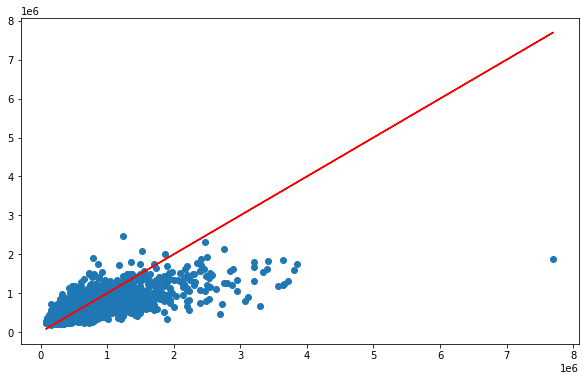

In [91]:
resizeplot(10,6)
plt.scatter(y_test,pred_knr)
plt.plot(y_test,y_test,color='red')

**XGBOOST**

In [92]:
xgb = XGBRegressor()

In [93]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
pred_xgb = xgb.predict(X_test)

In [95]:
score_xgb = xgb.score(X_train,y_train)

In [96]:
print(score_xgb)

0.9023726183249473


In [97]:
mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))

In [98]:
print('Mae_xgb: ',mae_xgb)
print('Mse_xgb: ',mse_xgb)
print('Rmse_xgb: ',rmse_xgb)

Mae_xgb:  126728.0119368349
Mse_xgb:  38253387061.76033
Rmse_xgb:  195584.73115701115


In [99]:
price_xgb = df['price']
predict_xgb = pd.Series(pred_xgb)
error_xgb = price_xgb-predict_xgb
data_xgb = {'Price':price_xgb,'Predictions':predict_xgb,'Error':error_xgb}
data_prev_xgb = pd.DataFrame(data_xgb)
data_prev_xgb.head()

,Price,Predictions,Error
0,221900.0,329656.78125,-107756.78125
1,538000.0,719878.81250,-181878.81250
2,180000.0,325304.18750,-145304.18750
3,604000.0,466939.03125,137060.96875
4,510000.0,753889.62500,-243889.62500


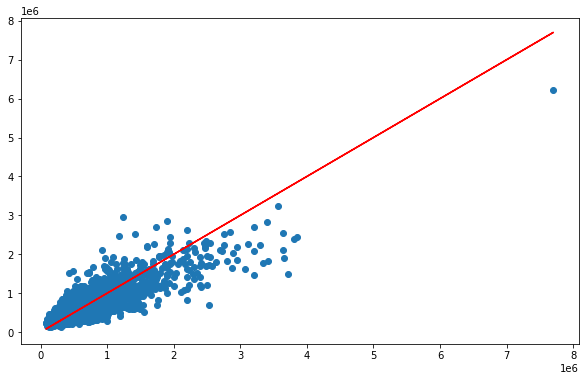

In [100]:
resizeplot(10,6)
plt.scatter(y_test,pred_xgb)
plt.plot(y_test,y_test,color='red')

In [101]:
print('Decision Tree Regressor: ',round(score_dtr,3), '->', 'Rmse_DTR: ',rmse_dtr)
print('Random Forrest Regressor: ', round(score_rfr,3), '->', 'Rmse_RFR: ',rmse_rfr)
print('XGBOOST Regressor: ', round(score_xgb,3),'Rmse_XGB:','->',rmse_xgb)
print('Polynomial Regressor: ', round(score_poly,3),'->','Rmse_POLY: ',rmse_poly)
print('Linear Regression: ', round(score_lr,3),'Rmse_LR: ','->',rmse_lr)
print('KNN Regressor: ', round(score_knr,3),'Rmse_KNN: ','->',rmse_knr)

Decision Tree Regressor:  0.999 -> Rmse_DTR:  265916.24886469945
Random Forrest Regressor:  0.958 -> Rmse_RFR:  194711.70232548064
XGBOOST Regressor:  0.902 Rmse_XGB: -> 195584.73115701115
Polynomial Regressor:  0.757 -> Rmse_POLY:  30917614.988717988
Linear Regression:  0.607 Rmse_LR:  -> 234146.10296834935
KNN Regressor:  0.59 Rmse_KNN:  -> 262994.8137385662


**It is important to note that although Decision Tree gave us a 99% score, the Random Forest Regressor dos algorithm gave a lower score, 95%, however the mean square error was lower than Decision tree. In that case it will depend on what the analyst looks for in relation to the data and whether this average value will be and well above what he wants or enough enough for the insight of his business.**


**Thats all for now guys,and be healthy and be safe.**